# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [2]:
import pandas as pd
import numpy as pd
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [4]:
import pandas as pd

iris = load_iris()

In [5]:

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9333333333333333


In [11]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [12]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3
평가 데이터 점수: 0.4666666666666667


In [13]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00168061, 0.00161409, 0.0013628 , 0.00104904, 0.00100923]),
 'score_time': array([0.00562835, 0.00599289, 0.00465298, 0.00430131, 0.00432968]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [14]:
param_grid = [{'n_neighbors' : [3, 5, 7],
              'weights' : ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [15]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [17]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [18]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [19]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [20]:
import numpy as np
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [21]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [22]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0
...,...,...,...
145,11.363099,-4.289077,2
146,10.691204,-1.015444,2
147,11.097084,-3.357184,2
148,13.195991,-3.724547,2


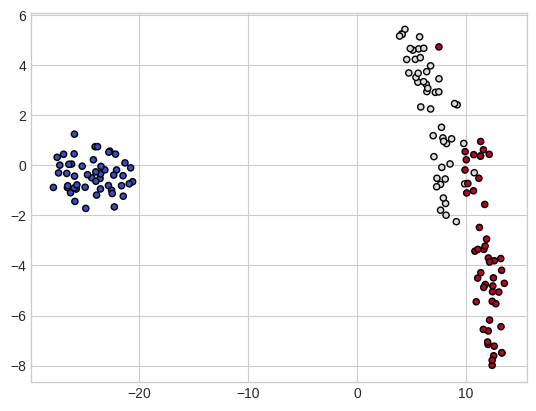

In [23]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [24]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

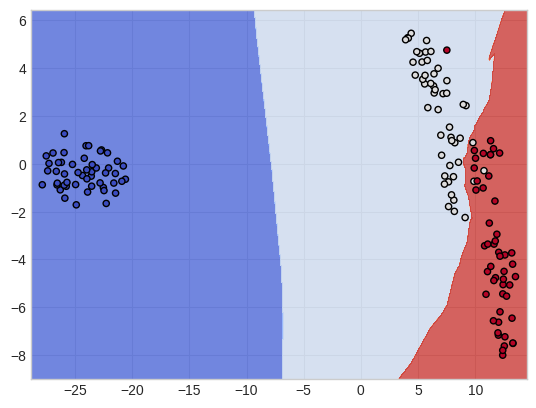

In [28]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 유방암 데이터

In [29]:
cancer = load_breast_cancer()

In [31]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [32]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487,1
1,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,14.20,112.50,854.3,0.15410,0.29790,0.40040,0.14520,0.2557,0.08181,1
2,27.22,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,0.05770,...,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082,0
3,13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,16.35,99.71,706.2,0.13110,0.24740,0.17590,0.08056,0.2380,0.08718,1
4,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,...,34.27,104.30,728.3,0.13800,0.27330,0.42340,0.13620,0.2698,0.08351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1
451,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.15510,0.42030,0.52030,0.21150,0.2834,0.08234,0
452,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294,0
453,17.01,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,25.05,130.00,1210.0,0.11110,0.14860,0.19320,0.10960,0.3275,0.06469,0


In [34]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.69,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,0.2131,0.07405,...,32.19,86.12,487.7,0.1768,0.32510,0.13950,0.13080,0.2803,0.09970,1
1,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300,0
2,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.15820,0.18040,0.09608,0.2664,0.07809,1
3,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,20.43,109.70,856.9,0.1135,0.21760,0.18560,0.10180,0.2177,0.08549,1
4,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,27.26,139.90,1403.0,0.1338,0.21170,0.34460,0.14900,0.2341,0.07421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,16.93,103.10,749.9,0.1347,0.14780,0.13730,0.10690,0.2606,0.07810,1
110,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955,...,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994,1
111,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661,1
112,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,...,21.57,81.41,440.4,0.1327,0.29960,0.29390,0.09310,0.3020,0.09646,1


In [39]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [40]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9428571428571428
평가 데이터 점수: 0.9385964912280702


In [42]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [97]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9859154929577465
평가 데이터 점수: 0.9722222222222222


In [43]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [44]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.3s finished


{'fit_time': array([0.00327182, 0.00328445, 0.0026629 , 0.00283575, 0.0022366 ]),
 'score_time': array([0.0587759 , 0.03502345, 0.00256586, 0.0025382 , 0.00276995]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [45]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [54]:
param_grid = [{'model__n_neighbors':[3, 5, 7],
              'model__weights':['uniform', 'distance'],
              'model__algorithm': ['ball tree', 'kd_tree', 'brute']}]

In [57]:
gs = GridSearchCV(
    estimator= pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [58]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [59]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7))])

In [61]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [63]:
tsne =TSNE(n_components=2)
X_comp =tsne.fit_transform(X)

In [67]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,42.104282,-12.535738,0
1,42.269810,-9.850520,0
2,37.661800,-9.865570,0
3,-17.582714,1.816186,0
4,36.543030,-7.761000,0
...,...,...,...
564,43.790070,-9.225799,0
565,38.597885,-9.270696,0
566,22.164120,-2.738216,0
567,40.147724,-9.924445,0


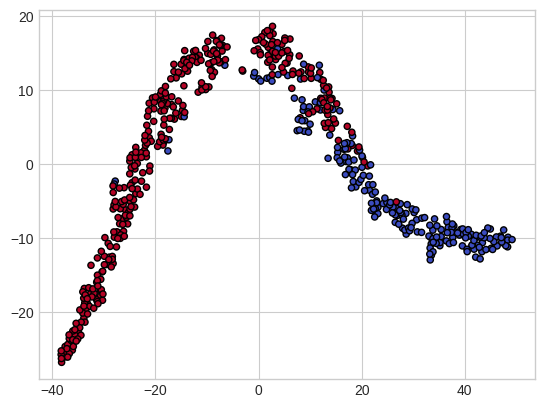

In [68]:
plt.scatter(X_comp[:, 0], X_comp[:,1], c=y,cmap=plt.cm.coolwarm,s=20, edgecolors='k');

In [69]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict =model.predict(X_comp)

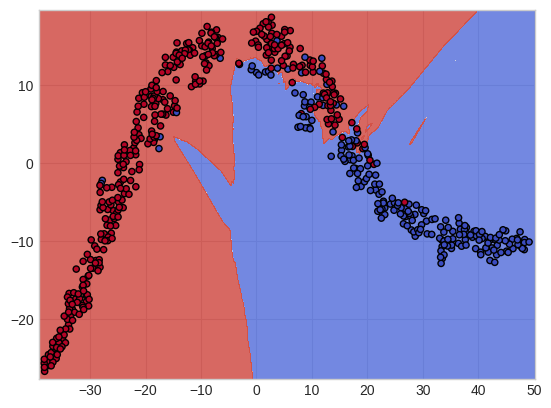

In [71]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인 데이터

In [76]:
from sklearn.datasets import load_wine

wine = load_wine()

In [78]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [79]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0,1
1,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0,1
2,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0,1
3,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0,1
4,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2
138,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0
139,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0,0
140,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [83]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2
1,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
2,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,0
3,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
4,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
5,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0
6,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
7,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
8,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0,1
9,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2


In [84]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [85]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7535211267605634
평가 데이터 점수: 0.8055555555555556


In [88]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [96]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9859154929577465
평가 데이터 점수: 0.9722222222222222


In [98]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [99]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00372696, 0.00688887, 0.00320625, 0.00248337, 0.00267601]),
 'score_time': array([0.00639319, 0.00654459, 0.00562572, 0.0059309 , 0.0043695 ]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [100]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [101]:
param_grid = [{'model__n_neighbors':[3, 5, 7],
              'model__weights':['uniform', 'distance'],
              'model__algorithm': ['ball tree', 'kd_tree', 'brute']}]

In [102]:
gs = GridSearchCV(
    estimator= pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [103]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [104]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7))])

In [105]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [106]:
tsne =TSNE(n_components=2)
X_comp =tsne.fit_transform(X)

In [107]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,10.776262,-0.487612,0
1,10.432003,-0.650546,0
2,12.985907,-0.837710,0
3,15.823071,-0.589132,0
4,2.084576,-0.622652,0
...,...,...,...
173,2.049382,-1.025591,2
174,2.485284,-0.999561,2
175,5.089700,-0.840400,2
176,5.249944,-0.763763,2


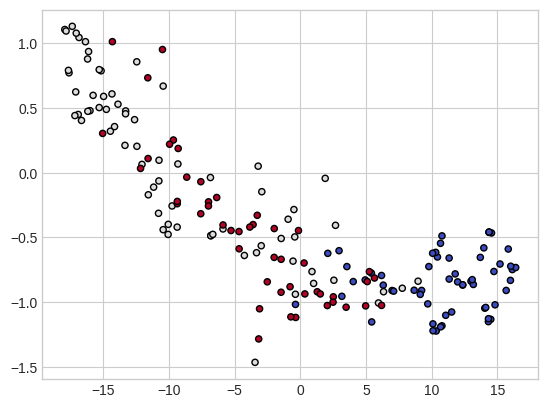

In [108]:
plt.scatter(X_comp[:, 0], X_comp[:,1], c=y,cmap=plt.cm.coolwarm,s=20, edgecolors='k');

In [109]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict =model.predict(X_comp)

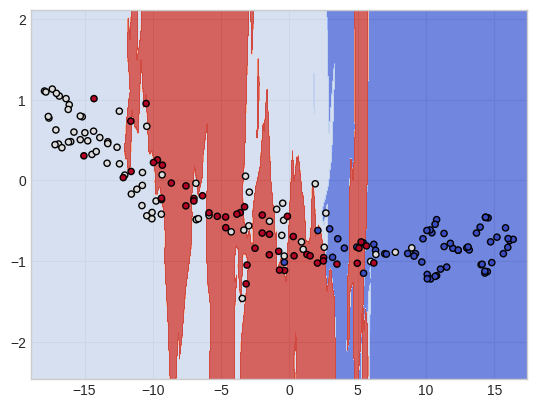

In [110]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 캘리포니아 주택 가격 데이터

In [111]:
california = fetch_california_housing()

In [112]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [113]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.8803,6.0,5.762493,1.046603,6163.0,3.460415,34.58,-117.78,1.200
1,2.6678,34.0,5.076220,1.102134,1592.0,2.426829,32.77,-117.01,1.642
2,2.8194,33.0,6.275401,1.232620,1482.0,3.962567,34.71,-118.14,0.930
3,5.0417,15.0,5.265372,0.967638,1772.0,2.867314,33.87,-118.11,2.408
4,5.0958,16.0,5.428198,1.028721,746.0,1.947781,32.79,-117.20,3.000
...,...,...,...,...,...,...,...,...,...
16507,6.3277,14.0,7.076072,1.090825,7087.0,3.267404,34.44,-118.55,2.377
16508,4.7319,35.0,4.926667,0.993333,1000.0,2.222222,33.93,-118.40,3.761
16509,3.1051,23.0,3.731289,1.031705,4757.0,2.472453,34.20,-118.33,2.065
16510,2.9781,31.0,3.642738,1.051753,1069.0,1.784641,32.80,-117.25,2.125


In [116]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.7716,12.0,9.286822,1.124031,863.0,3.344961,36.84,-119.84,2.292
1,4.5042,9.0,7.129129,1.117117,884.0,2.654655,39.04,-121.07,2.064
2,2.8942,26.0,4.718182,1.039394,1948.0,2.951515,32.73,-117.09,1.241
3,4.2083,40.0,5.164134,1.051672,1188.0,3.610942,33.88,-118.20,1.473
4,4.6029,15.0,6.134021,0.992268,1292.0,3.329897,37.99,-121.84,1.426
...,...,...,...,...,...,...,...,...,...
4123,5.2261,36.0,6.065217,1.013587,951.0,2.584239,34.28,-119.25,3.032
4124,5.7268,23.0,6.009009,1.027027,1560.0,2.810811,33.99,-117.97,3.003
4125,6.1825,27.0,6.756637,0.973451,756.0,3.345133,34.30,-118.70,2.270
4126,2.8650,38.0,4.556150,0.927807,1384.0,3.700535,34.29,-118.43,1.555


In [118]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [119]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.4472946258500101
평가 데이터 점수 : 0.16013780295572033


In [121]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [123]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.7905707457886435
평가 데이터 점수 : 0.6844417529730855


In [125]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [126]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    5.2s finished


{'fit_time': array([0.06274486, 0.09834862, 0.07390499, 0.06752658, 0.07822752]),
 'score_time': array([0.96307874, 0.78528214, 0.89477658, 0.88134503, 0.62616634]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [127]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [132]:
param_grid = [{'model__n_neighbors':[ 3, 5, 7],
               'model__weights':['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree','brute']}]

In [133]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [134]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [135]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [136]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [138]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [139]:
california_comp_df = pd.DataFrame(data=X_comp)
california_comp_df['target'] = y
california_comp_df

,0,target
0,-116.784935,4.526
1,89.223648,3.585
2,-98.744530,3.521
3,-90.634514,3.413
4,-89.940598,3.422
...,...,...
20635,-46.864765,0.781
20636,-113.780830,0.771
20637,-23.159233,0.923
20638,-61.953739,0.847


<ipython-input-140-2e14203f0af2>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


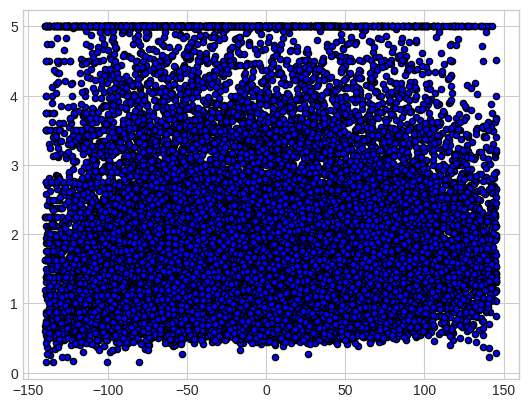

In [140]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [141]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

<ipython-input-142-c824c16908cd>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
<ipython-input-142-c824c16908cd>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')


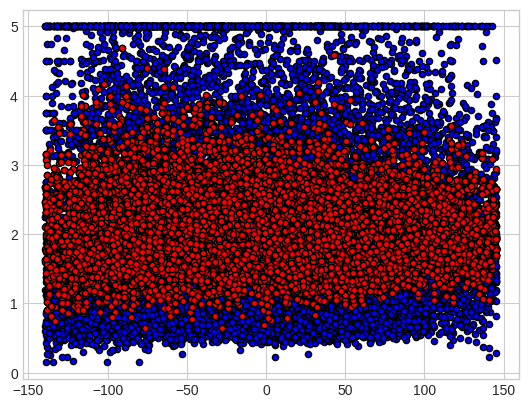

In [142]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')